# ***Proyecto 1 – Predecir la calidad del Vino***
Integrantes: Claudia Herenia Galindo Rojas, Jaime Andrés Carvajal Gutierrez, Sergio Herrera Quijano, Edison Yesid Herrera, Johana Trejos, Luisa Fernanda Cristancho.


Se pretede hacer una exploración de las variables que afectan la calidad de los vinos producidos por la region vinicola Vinho Verde en Portugal, para esto se toma como punto de partida un "DataFrame" que contiene 1599 muestras de vinos con la medicion de doce de sus propiedades fisico-quimicas, junto con su calificacion de calidad en una escala de 1 a 10. A partir de esta informacion se quiere realizar un modelo de Machine Learning para predecir la calidad que tendrá un vino dependiendo de las variales medidas.

Primero se van a importar todas la librerias necesarias para la solución de nuestro ejercicio 

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
import random
from sklearn.preprocessing import PolynomialFeatures

In [13]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
import random
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import ColumnTransformer

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

Se llama a nuestro archivo "winequality-red.csv" y se checkea los porcentajes de los valores que estén NAN

Se decide hace una copia del dataframe df para poder, en caso de que en este primer ejercico no se logre, volver a usar el dataframe sin cambios y modelar nuevamente 

In [15]:
import pandas as pd

df = pd.read_csv("winequality-red.csv")

dfSecondary = df.copy()

# Revisar si existen valores NaN
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.info()

#La variable quality es una variable numerica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Como resultado de la exploración del estado del DataFrame se pudo observar que no existen valores nulos en las variables, por otro lado, estas variables contienen valores numericos decimales, siendo la variable de Calidad (quality) la unica que se presenta en valores enteros. 

**Primer intento de Modelo de regresion usando todas las variables**

In [18]:
#Definir variables 

X = df.drop('quality', axis=1)
y = df['quality']

In [19]:
X.shape

(1599, 11)

In [20]:
y.shape

(1599,)

In [21]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

In [22]:
#PIPELINE

numeric_features = ['fixed acidity', 'volatile acidity', 
                    'citric acid',
                    'residual sugar',
                    'chlorides',
                    'free sulfur dioxide',
                    'total sulfur dioxide',
                    'density',
                    'pH',
                    'sulphates',	
                    'alcohol']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer (strategy="median")), ("scaler", StandardScaler())]
)


preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features), 
    ]
)

In [23]:
model_rl = Pipeline(
    steps= [("preprocessor", preprocessor), ("reglin", LinearRegression())] 
)

model_sgd = Pipeline(
    steps= [("preprocessor", preprocessor), ("regSGDR", SGDRegressor())] 
)

model_ridge = Pipeline(
    steps= [("preprocessor", preprocessor), ("regRID", Ridge())] 
)

model_lasso = Pipeline(
    steps= [("preprocessor", preprocessor), ("regLASS", Lasso())] 
)

In [24]:
model_rl.fit(X_train, y_train)
print("Modelo Regresion Lineal: %3f" % model_rl.score(X_test, y_test))

model_sgd.fit(X_train, y_train)
print("Modelo SGDR: %3f" % model_sgd.score(X_test, y_test))

model_ridge.fit(X_train, y_train)
print("Modelo Ridge: %3f" % model_ridge.score(X_test, y_test))

model_lasso.fit(X_train, y_train)
print("Modelo Lasso: %3f" % model_lasso.score(X_test, y_test))

Modelo Regresion Lineal: 0.335484
Modelo SGDR: 0.320358
Modelo Ridge: 0.335518
Modelo Lasso: -0.000706


**Resultados de nuestos primeros modelos** 

El **Modelo de Regresión Lineal** nos dice que en un 33.5% la variabilidad de la calidad del vino rojo puede ser explicada por las caracterísiticas físico-químicas del mismo. Esto sugiere que el modelo tiene cierta capacidad predictiva, pero aún queda una cantidad significativa de variabilidad sin explicar.
El **Modelo SGDR** nos muestra que en un 34.0% las caracterísiticas del vino pueden explicar su clidad. Con este modelo obtenemos un 0.5% más de rendimiento, siendo de igual forma bajo.
El **Modelo Ridge** tiene un porcentaje similar al de la regresión lineal. Haciendo una aproximación, el 33.6% de la variabilidad en la calidad del vino puede ser explicada por sus componentes y/o caracterísitcas. Sin embargo, al no mejorar significativamente los demás modelos, se puede decir que no ajusta efectivamente la predicción.
El **Modelo Lasso** al tener un porcentaje negativo, podemos llegar a concluir que este modelo no es capaz de explicar la variabilidad en la calidad del vino de una forma satisfactoriamente significativa.

In [25]:
y_predict = model_rl.score(X, y)
print("Coefficient of determination in the training set: ", y_predict)
print("MAE: ", mean_absolute_error (y_test, model_rl.predict(X_test)))
print("MSE: ", mean_squared_error (y_test, model_rl.predict(X_test)))
print("RMSE: ", np.sqrt (mean_squared_error(y_test, model_rl.predict(X_test))))

Coefficient of determination in the training set:  0.3574580843676589
MAE:  0.4986280510037936
MSE:  0.4391776420313209
RMSE:  0.6627047925217691


El **coeficiente de determinación** nos indica que el 35.7% de la variabilidad en la calidad del vino puede ser explicada gracias a las caracterísitcas físico-químicas del mismo. En este sentido, un coeficiente de 1 nos indicaría que el modelo tiene un ajuste perfecto, por lo que se puede entender que nuestro modelo llega a explicar en parte (pero no en su totalidad) los cambios en la calidad del vino.

Gracias al valor del **error absoluto medio** podemos confirmar que el modelo se equivoca en alrededor 0.5 unidades al predecir la calidad del vino. 

El **error cuadrático medio** tiene un valor de 0.44, este es el promedio de los cuadrados de los errores entre las predicciones y los valores reales. Por otro lado, la **raíz del error medio** nos muestra los resultados de la raíz cuadrada de MSE, la cual, en nuestra proyección tiene un valor de 0.66. Este valor nos da una idea de la magnitud de errores en nuestra predicción en la misma escala que la variable que estás prediciendo.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [27]:
model_rf_regressor = Pipeline(
    steps= [("preprocessor", preprocessor), ("regramfor", RandomForestRegressor())] 
)

In [28]:
model_rf_regressor.fit(X_train, y_train)
print("Modelo Regressor: %3f" % model_rf_regressor.score(X_test, y_test))

Modelo Regressor: 0.468825


Gracias al modelo regresor nos subió nuestra prediccion a 47.11%. Esto puede ser interpretado como que el 47.11% de la variación en la calidad del vino puede ser explicada por las caracterísiticas del mismo.

***Revisar como se puede mejorar el modelo***

In [29]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

- Revisar la correlación entre las variables

Se propone hacer una revisión en la correlación de las variables para, de esta forma, sacar las que tengan una correlación más baja y/o nula y ver si mejora la predicción 

In [30]:
title_font = {
    "family" : "arial",
    "color" : "darkred",
    "weight" : "bold",
    "size" : 15
}

axis_font = {
    "family" : "arial",
    "color" : "darkblue",
    "weight" : "bold",
    "size" : 13
}

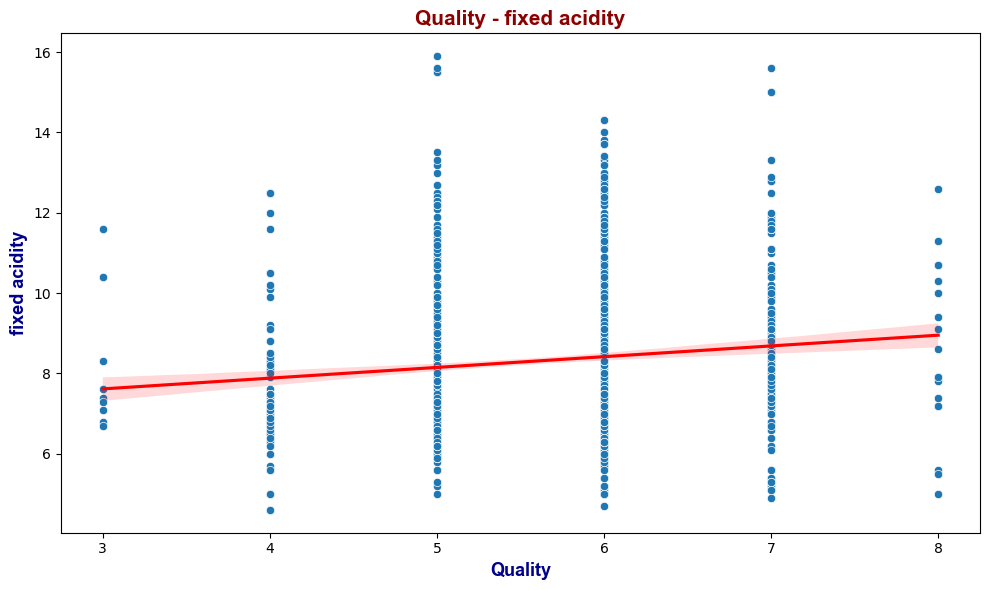

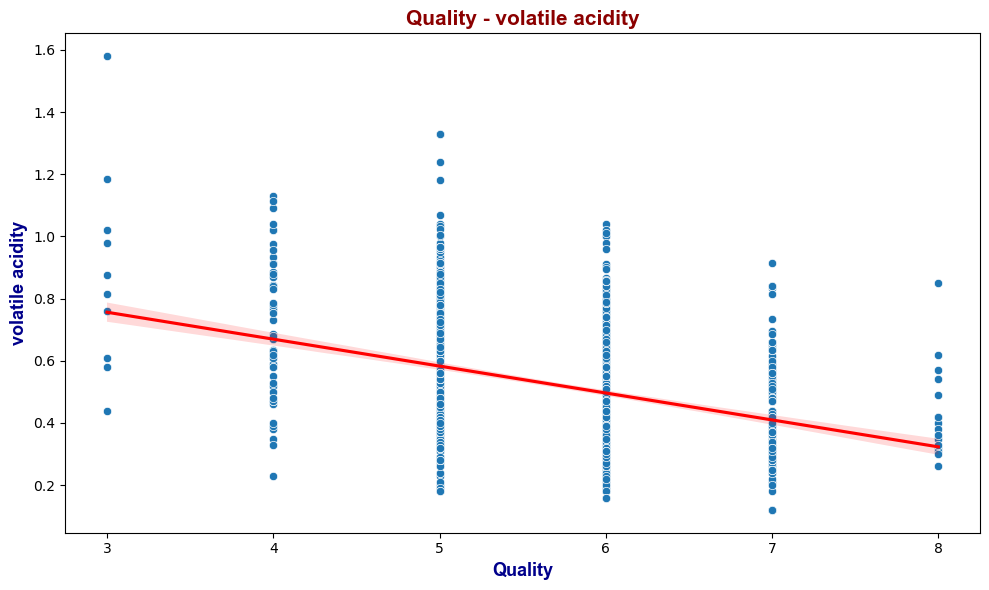

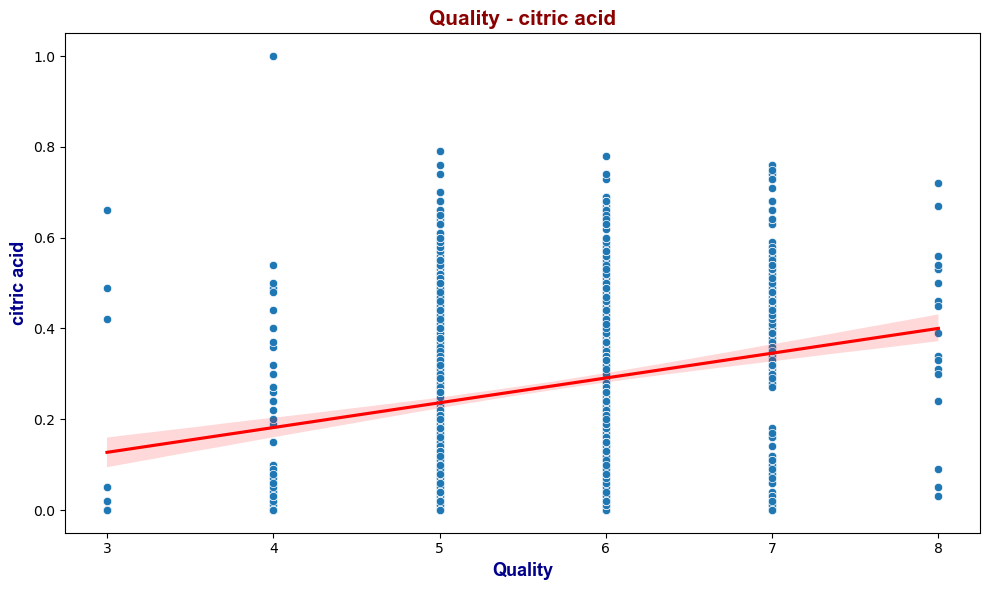

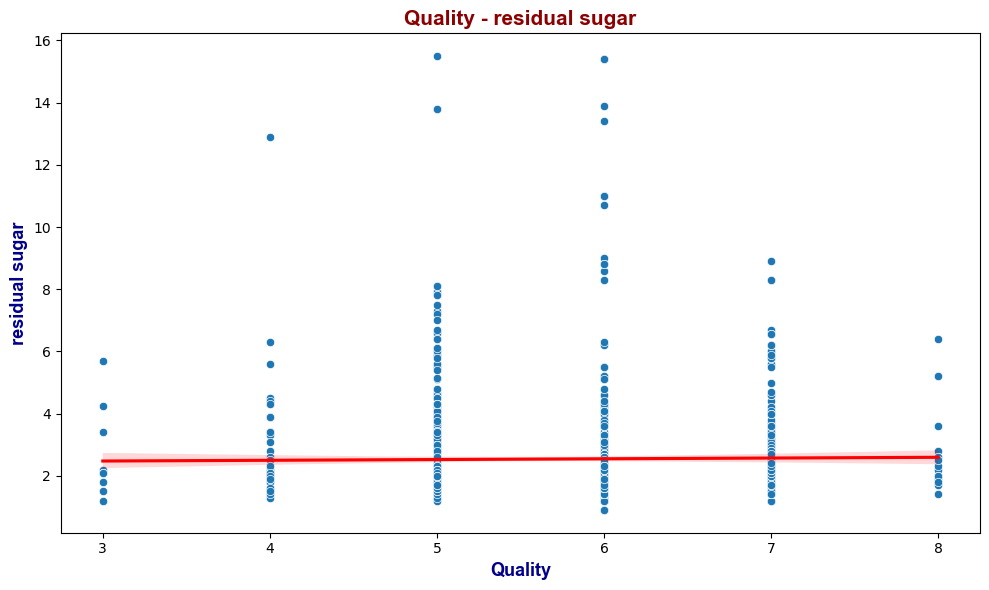

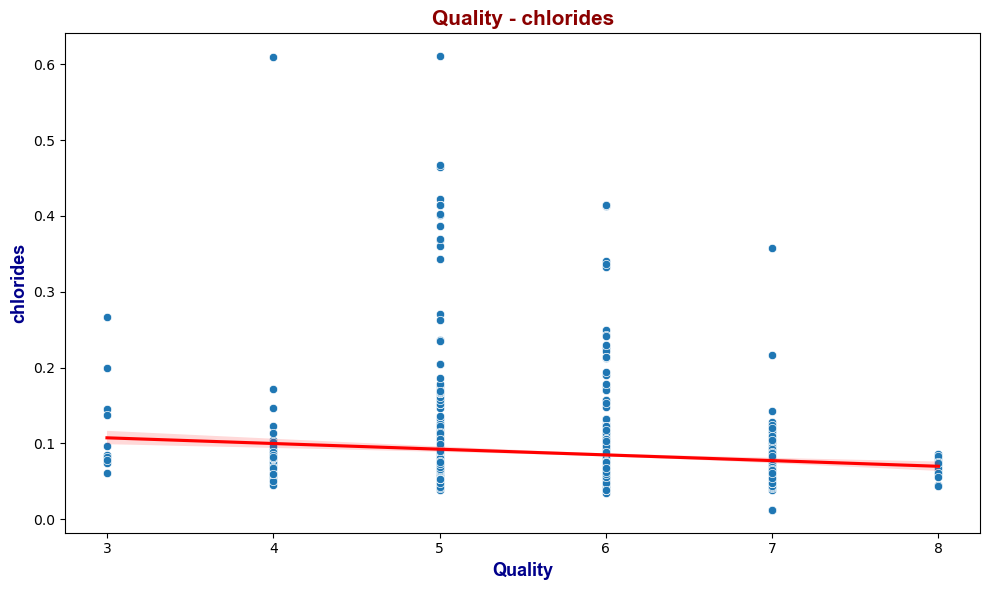

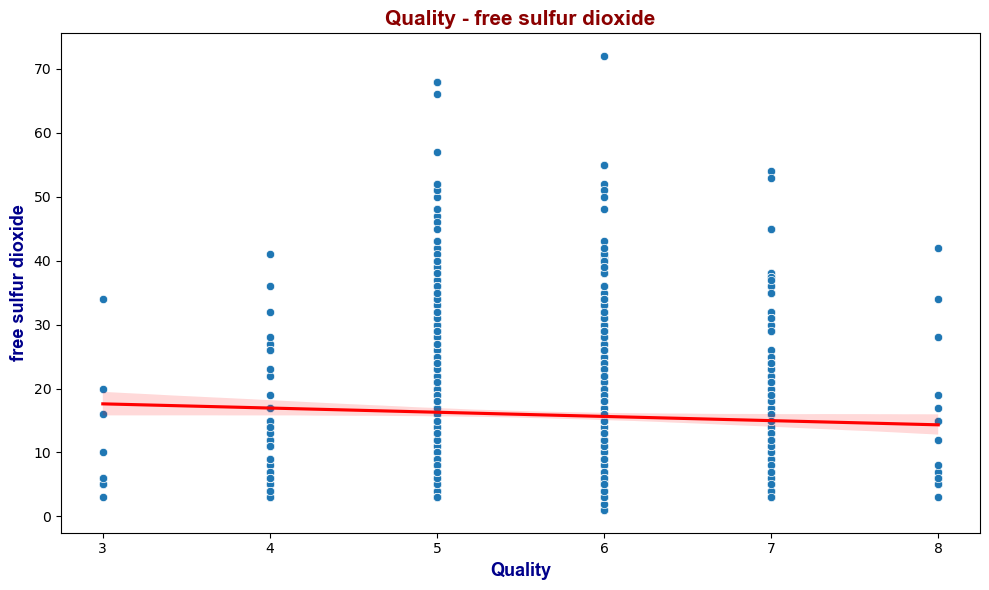

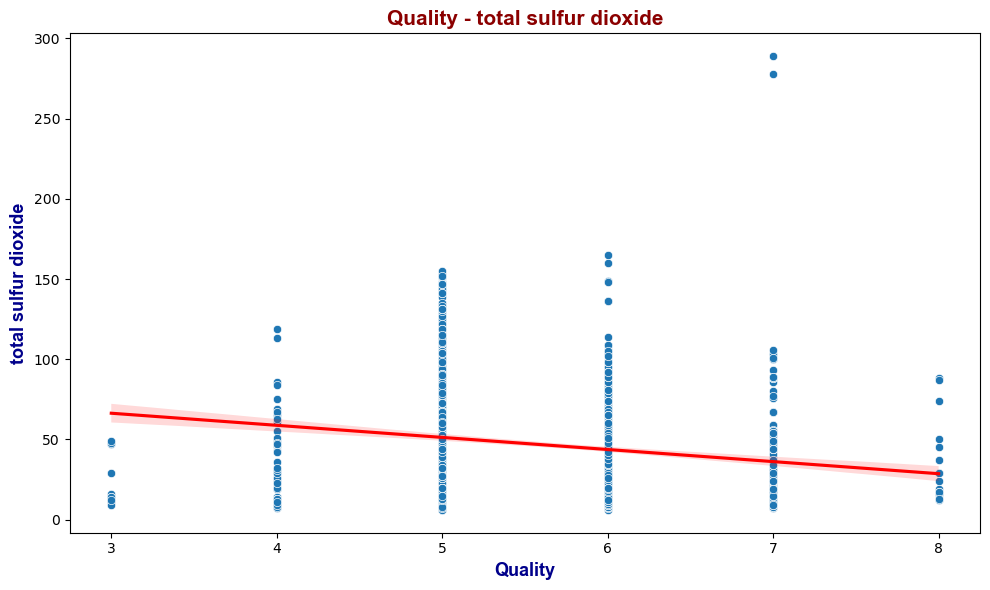

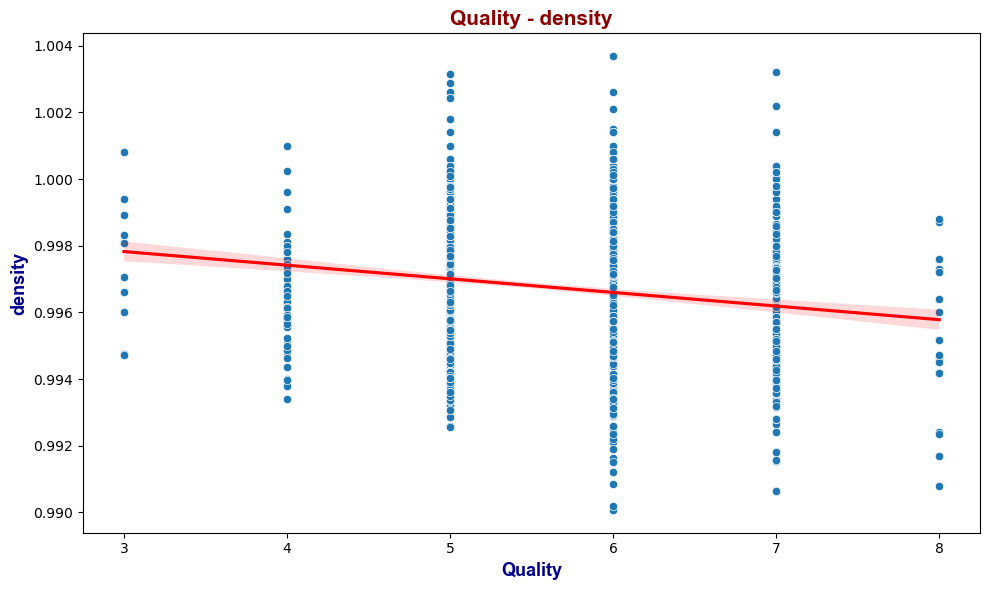

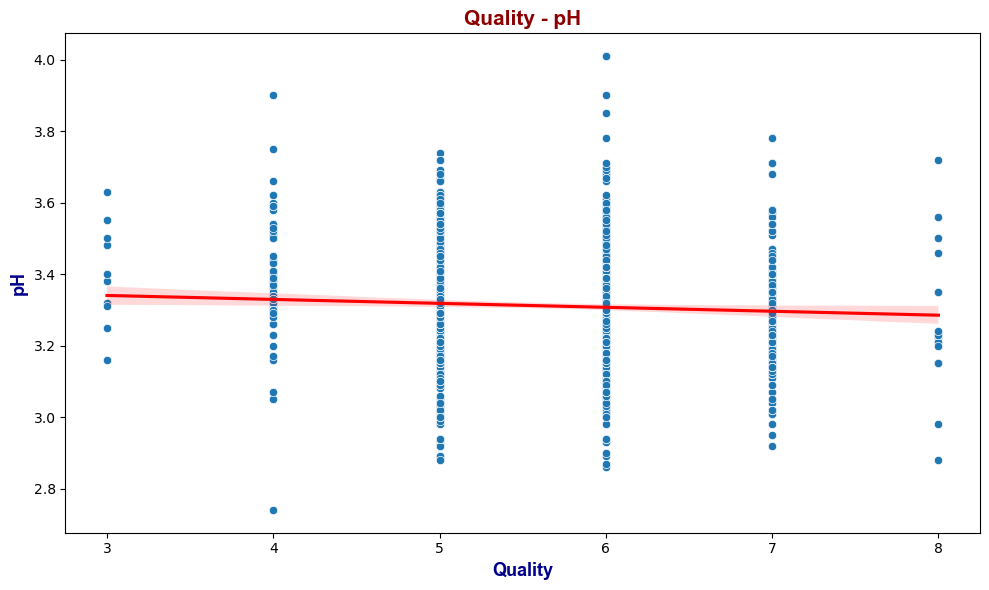

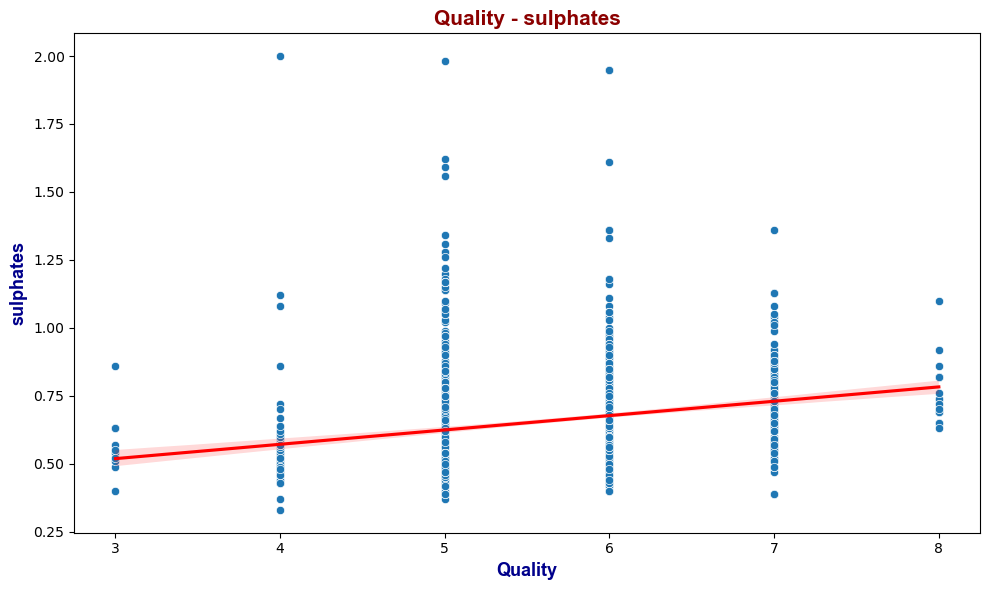

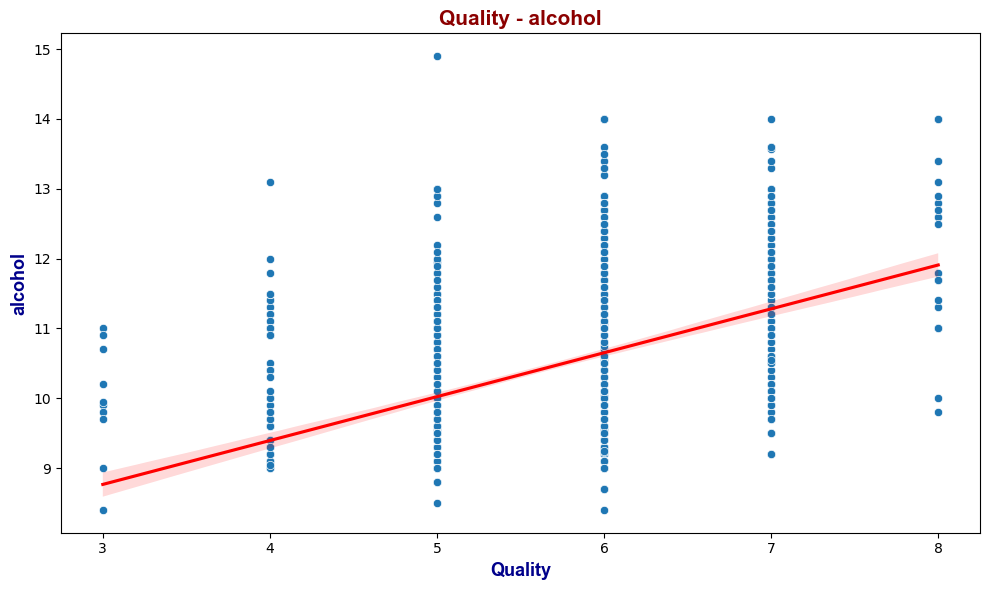

In [31]:
for i in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="quality", y=i, data=df)
    sns.regplot(x="quality", y=i, data=df, scatter=False, color='red')  # Adding regression line
    plt.title("Quality - " + i, fontdict=title_font)
    plt.xlabel("Quality", fontdict=axis_font)
    plt.ylabel(i, fontdict=axis_font)
    plt.tight_layout()
    plt.show()

Se puede decir que las variables con correlación baja son: 
- residual sugar
- free sulfur dioxide 
- ph

In [32]:
#se quitan las columnas que no tienen una correlación alta

df.drop(["residual sugar","free sulfur dioxide", "pH"], axis = 1, inplace = True)

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


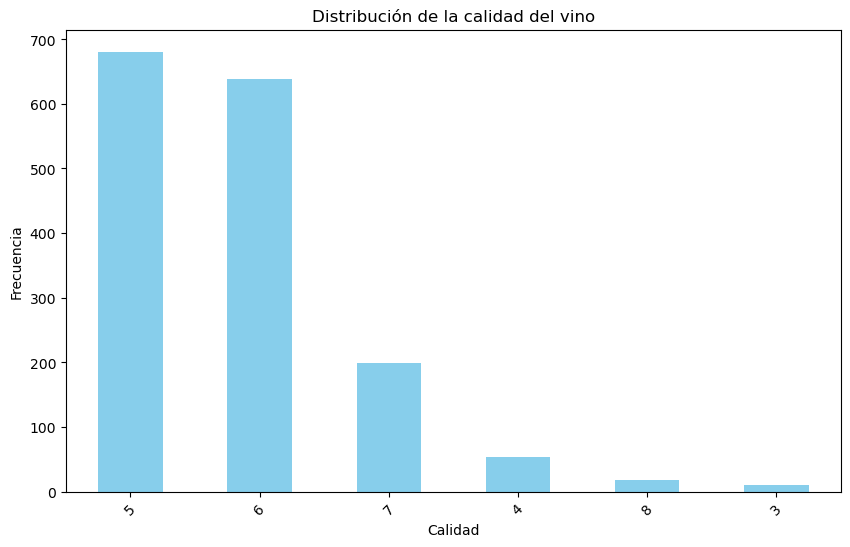

In [34]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada categoría
quality_counts = df['quality'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la calidad del vino')
plt.xticks(rotation=45)
plt.show()

Se pasa a intentar nuevamente el modelo

In [35]:
#Definir variables 

X = df.drop('quality', axis=1)
y = df['quality']

In [36]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

In [37]:
#PIPELINE

numeric_features = ['fixed acidity', 'volatile acidity',
                    'citric acid',
                    'chlorides',
                    'total sulfur dioxide',
                    'density',
                    'sulphates',	
                    'alcohol']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer (strategy="median")), ("scaler", StandardScaler())]
)


preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features), 
    ]
)

In [38]:
model_rl = Pipeline(
    steps= [("preprocessor", preprocessor), ("reglin", LinearRegression())] 
)

model_sgd = Pipeline(
    steps= [("preprocessor", preprocessor), ("regSGDR", SGDRegressor())] 
)

model_ridge = Pipeline(
    steps= [("preprocessor", preprocessor), ("regRID", Ridge())] 
)

model_lasso = Pipeline(
    steps= [("preprocessor", preprocessor), ("regLASS", Lasso())] 
)

In [39]:
model_rl.fit(X_train, y_train)
print("Modelo Regresion Lineal: %3f" % model_rl.score(X_test, y_test))

model_sgd.fit(X_train, y_train)
print("Modelo SGDR: %3f" % model_sgd.score(X_test, y_test))

model_ridge.fit(X_train, y_train)
print("Modelo Ridge: %3f" % model_ridge.score(X_test, y_test))

model_lasso.fit(X_train, y_train)
print("Modelo Lasso: %3f" % model_lasso.score(X_test, y_test))

Modelo Regresion Lineal: 0.340731
Modelo SGDR: 0.341361
Modelo Ridge: 0.340773
Modelo Lasso: -0.000706


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [41]:
model_rf_regressor = Pipeline(
    steps= [("preprocessor", preprocessor), ("regramfor", RandomForestRegressor())] 
)

In [42]:
model_rf_regressor.fit(X_train, y_train)
print("Modelo Regressor: %3f" % model_rf_regressor.score(X_test, y_test))

Modelo Regressor: 0.455282


In [43]:
y_predict = model_rl.score(X, y)
print("Coefficient of determination in the training set: ", y_predict)
print("MAE: ", mean_absolute_error (y_test, model_rl.predict(X_test)))
print("MSE: ", mean_squared_error (y_test, model_rl.predict(X_test)))
print("RMSE: ", np.sqrt (mean_squared_error(y_test, model_rl.predict(X_test))))

Coefficient of determination in the training set:  0.3533070508388487
MAE:  0.49895077738992455
MSE:  0.4357096108289264
RMSE:  0.6600830332836365


Se ve que los datos no cambian mucho a comparación del primer modelo realizado. 


*¿Poner como variable categórica la cualidad?*

In [44]:
# Creamos nuevos intervalos para clasificar la calidad como "bad" o "good"
bins = [0, 6, 10]  # Intervalos para clasificar como "bad" o "good"

# Creamos nuevos nombres de grupos
group_names = ["malo", "bueno"]

# Aplicamos la clasificación
df["quality"] = pd.cut(df["quality"], bins=bins, labels=group_names, include_lowest=True)

from sklearn.preprocessing import LabelEncoder
new_quality = LabelEncoder()

df["quality"] = new_quality.fit_transform(df["quality"])

In [45]:
df['quality'].value_counts()

quality
1    1382
0     217
Name: count, dtype: int64

Se decide pasar la variable a una variable categórica para tener en datos "malo", "regular" y "bueno". Después de eso se clasifica en valores 0, 1 y 2

In [46]:
df['quality'].info

<bound method Series.info of 0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int32>

In [47]:
#definir variables

X = df.drop(["quality"], axis = 1)
y = df["quality"]

In [48]:
X.shape

(1599, 8)

In [49]:
y.shape

(1599,)

In [50]:
df['quality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1599 non-null   int32
dtypes: int32(1)
memory usage: 6.4 KB


In [51]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

X_train.shape, X_test.shape

((1279, 8), (320, 8))

In [52]:
#PIPELINE

numeric_features = ['fixed acidity', 'volatile acidity',
                    'citric acid',
                    'chlorides',
                    'total sulfur dioxide',
                    'density',
                    'sulphates',	
                    'alcohol']

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer (strategy="median")), ("scaler", StandardScaler())]
)


preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features), 
    ]
)

In [53]:
model_rl = Pipeline(
    steps= [("preprocessor", preprocessor), ("reglin", LinearRegression())] 
)

model_sgd = Pipeline(
    steps= [("preprocessor", preprocessor), ("regSGDR", SGDRegressor())] 
)

model_ridge = Pipeline(
    steps= [("preprocessor", preprocessor), ("regRID", Ridge())] 
)

model_lasso = Pipeline(
    steps= [("preprocessor", preprocessor), ("regLASS", Lasso())] 
)

In [54]:
print(df.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [55]:
model_rl.fit(X_train, y_train)
print("Modelo Regresion Lineal: %3f" % model_rl.score(X_test, y_test))

model_sgd.fit(X_train, y_train)
print("Modelo SGDR: %3f" % model_sgd.score(X_test, y_test))

model_ridge.fit(X_train, y_train)
print("Modelo Ridge: %3f" % model_ridge.score(X_test, y_test))

model_lasso.fit(X_train, y_train)
print("Modelo Lasso: %3f" % model_lasso.score(X_test, y_test))

Modelo Regresion Lineal: 0.119689
Modelo SGDR: 0.120638
Modelo Ridge: 0.119873
Modelo Lasso: -0.004296


Con estos ajustes, se puede ver que disminuye el porcentaje; lo que podemos decir que con este nuevo ajuste y modelo solo se puede llegar a decir que entre un 12% se puede llegar a predecir la variabilidad de la calidad del vino por sus componentes

Se pasa a considerar hacer un RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [57]:
model_rf_regressor = Pipeline(
    steps= [("preprocessor", preprocessor), ("regramfor", RandomForestRegressor())] 
)

In [58]:
model_rf_regressor.fit(X_train, y_train)
print("Modelo Regressor: %3f" % model_rf_regressor.score(X_test, y_test))

Modelo Regressor: 0.247334


Al intentar con el modelo regressor, sube el porcentaje, sin embargo no es muy significativo

Se crea una instancia de RandomForestClassifier con max_depth=3 para limitar la profundidad de cada árbol y evitar sobreajuste

In [59]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(random_state=0,max_depth=3)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=0)

Se utilizan las características de X_test para hacer predicciones sobre la calidad del vino

In [60]:
y_pred=classifier.predict(X_test)

Se compara las predicciones (y_pred) con las etiquetas reales (y_test) utilizando accuracy_score para calcular la precisión del modelo

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.884375

La exactitud de este modelo aumenta significativamente a 0.88. Podemos ver que, gracias a este modelo de aprendizaje, el cual combinó múltiples árboles de decisión para llegar a la clasificación, es el más preciso hasta el momento. Además, al tratarse de un modelo de clasificación, dentro de su lógica de predicción es más eficiente que un modelo de regresión, ya que el modelo de regresión lineal funciona mejor con valores continuos y no categóricos.

**Regresión Logística**

In [62]:
from sklearn.linear_model import LogisticRegression

#Definimos nuestras varibles X e y 
X = df.drop(['quality'], axis=1)
y = df['quality']

#Dividimos nuestras variables en prueba y testeo con porcentaje de testeo de 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Pasamos a hacer el modelo de regresión loística 
logistic_regression = LogisticRegression(random_state=0, max_iter=4000)
#Se sube el máximo de interaciones para mejorar la optimización del algoritmo. Se intentó con valores menores, pero el modelo no convergía

#Entrenamos el modelo 
logistic_regression.fit(X_train, y_train)

#Hacemos un modelo para predecir las etiquetas de calidad para el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

#Evaluamos la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de regresión logística: {accuracy}')

Precisión del modelo de regresión logística: 0.853125


Se ve que con la aplicación del modelo de regresión logística, tenemos una exactitud casi similar a la del modelo anterior. Este modelo nos ayuda más que el lineal o el resto, pues usa clasificación binaria, la cual, hemos usado en nuestra variable *quality*. 

**VAMOS A INTENTAR SUBIR LOS RESULTADOS DE NUESTROS MODELOS DE RIDGE, LASSO, SDG Y LINEAL**

Lo primero que vamos a hacer es crear una nueva categoría llamada *quality_numeric* 

In [63]:
import pandas as pd

# Asignamos las calificaciones numéricas a las categorías correspondientes
dfSecondary['quality_numeric'] = pd.cut(dfSecondary['quality'], bins=[2, 4, 6, 8], labels=[1, 2, 3])

# Convertimos los valores de categoría a enteros
dfSecondary['quality_numeric'] = dfSecondary['quality_numeric'].astype(int)

# Verificamos los cambios
print(dfSecondary['quality_numeric'].value_counts())

quality_numeric
2    1319
3     217
1      63
Name: count, dtype: int64


Vamos a volver a hacer una copia, ahora del dataframe *dfSecondary*, la copia la vamos a llamar *dfFinal*. Con esta copia vamos a calcular la correlación de todos los valores en el dataframe con respecto a la columna *quality_numeric*

In [64]:
dfFinal = dfSecondary.copy()
correlacion = dfFinal.corr()['quality_numeric'].sort_values()
 

print(correlacion)
#dfFinal = dfFinal.drop(["pH", "total sulfur dioxide", "free sulfur dioxide"], axis=1) 
dfFinal.info()

volatile acidity       -0.333816
density                -0.123566
chlorides              -0.098829
pH                     -0.093946
total sulfur dioxide   -0.081960
free sulfur dioxide    -0.025075
residual sugar          0.030153
fixed acidity           0.125886
sulphates               0.205409
citric acid             0.228930
alcohol                 0.361363
quality                 0.812367
quality_numeric         1.000000
Name: quality_numeric, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur 

Vamos a dividir los datos en conjunto de entrenamiento y prueba. Para este caso, vamos a seguir utilizando un tamaño de prueba del 20%

In [65]:
from sklearn.model_selection import train_test_split
 

X = dfFinal.drop('quality_numeric', axis=1)
y = dfFinal['quality_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer (strategy="median")), ("scaler", StandardScaler())]
    )

processorColumnTransformer = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)] 
)

In [67]:
from sklearn.linear_model import Ridge, SGDRegressor , Lasso
from sklearn.linear_model import LinearRegression 

model_rl = Pipeline(
    steps=[("preprocessor", processorColumnTransformer), ("classifier", LinearRegression())]
)

model_sgd = Pipeline(
    steps=
    [
        ("preprocessor", processorColumnTransformer), 
        ('scaler', StandardScaler()),
        ("classifier", SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
    ]
)

model_ridge = Pipeline(
    steps=
    [
        ("preprocessor", processorColumnTransformer), 
        ('scaler', StandardScaler()),
        ("classifier", Ridge())
    ]
)

model_lasso = Pipeline(
    steps=
    [
        ("preprocessor", processorColumnTransformer), 
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=0.01, random_state=42))
    ]
)


In [68]:
model_rl.fit(X_train, y_train)
print("Modelo de regresion lineal %3f" % model_rl.score(X_test, y_test))

model_sgd.fit(X_train, y_train)
print("Modelo de SGD %3f" % model_sgd.score(X_test, y_test))

model_ridge.fit(X_train, y_train)
print("Modelo de Ridge %3f" % model_ridge.score(X_test, y_test))

model_lasso.fit(X_train, y_train)
print("Modelo de Lasso %3f" % model_lasso.score(X_test, y_test))

Modelo de regresion lineal 0.666719
Modelo de SGD 0.666534
Modelo de Ridge 0.666767
Modelo de Lasso 0.666795
